# Programa Ingenias+ Data Science

## Objetivo del proyecto

Predecir si una persona tendrá hipertension alta o no, en base a sus hábitos y/o condiciones socioeconómicas

## Objetivo del notebook

El objetivo de este notebook es evaluar y comparar diversos algoritmos de clasificación para identificar cuál ofrece los mejores resultados en términos de precisión y otros parámetros de rendimiento. 

La variable objetivo en este análisis es **mantiene_ha_alta**, las columnas de características que se utilizarán en el notebook se detallan a continuación.


## Importación de archivos y librerías

In [1]:
# Imports de librerías y funciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder,  OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

from utils.codificaciones import *
from utils.funcions import *

In [2]:
# Importar el csv
friesgo = pd.read_csv('datasets/friesgo.csv')

## Preprocesado

### Identificación de variables

In [3]:
# Separar variables categóricas y numéricas
variables_categoricas = ['cod_provincia','tamanio_aglomerado','sexo','condicion_actividad','ansiedad_depresion'
                           ,'nivel_actividad_fisica','condicion_fumador','consumo_sal'
                           ,'colesterol_alto','freq_cons_alc','es_diabetico','mantiene_ha_alta']
variables_numericas = ['edad','media_fv_diaria','imc_numerico']

In [4]:
# Copiar el dataframe
friesgo_cod = friesgo.copy()

### Evaluación y procesamiento de nulos

In [5]:
calcular_nulos_y_porcentaje(friesgo_cod)

,Nulos,Porcentaje
id,0,0.0%
cod_provincia,0,0.0%
tamanio_aglomerado,0,0.0%
sexo,0,0.0%
edad,0,0.0%
condicion_actividad,0,0.0%
ansiedad_depresion,0,0.0%
nivel_actividad_fisica,226,0.84%
condicion_fumador,0,0.0%
mantiene_ha_alta,0,0.0%


In [6]:
# Eliminación de nulos
friesgo_cod = friesgo_cod.dropna()

In [7]:
calcular_nulos_y_porcentaje(friesgo_cod)

,Nulos,Porcentaje
id,0,0.0%
cod_provincia,0,0.0%
tamanio_aglomerado,0,0.0%
sexo,0,0.0%
edad,0,0.0%
condicion_actividad,0,0.0%
ansiedad_depresion,0,0.0%
nivel_actividad_fisica,0,0.0%
condicion_fumador,0,0.0%
mantiene_ha_alta,0,0.0%


### Codificación de columnas

In [8]:
# Visualización de filas y columnas
friesgo_cod.shape

(25539, 16)

In [9]:
# Codificación de columnas
le = LabelEncoder()
for columnas in variables_categoricas:
    friesgo_cod[columnas] = le.fit_transform(friesgo_cod[columnas])

In [10]:
# Evaluación de variable objetivo
friesgo_cod.mantiene_ha_alta.unique()

array([1, 0], dtype=int64)

In [11]:
# Evaluar que no haya pérdida de filas y/o columnas por la codificación
friesgo_cod.shape

(25539, 16)

### División del modelo en train-test

In [12]:
# Division del dataset en train-test en este caso el tamaño de la muestra sera del 30%
y = friesgo_cod['mantiene_ha_alta']
X = friesgo_cod.drop(columns=['mantiene_ha_alta','id'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Análisis de modelos

### Modelo 1: Regresión logística

#### Entrenamiento del modelo

In [13]:
# Crear el pipeline sólo con el clasificador
# max_iter se agrega como parámetro porque el número de iteraciones por defecto no son suficientes
modelo_rl = Pipeline(steps=[
    ('classifier', LogisticRegression(max_iter=500))
])

# Entrenar el modelo
modelo_rl.fit(X_train, y_train)

Pipeline(steps=[('classifier', LogisticRegression(max_iter=500))])

#### Evaluación del modelo

In [14]:
# Hacer predicciones
y_pred_rl = modelo_rl.predict(X_test)

# Evaluar el modelo
score = accuracy_score(y_test, y_pred_rl)

print(f'Exactitud del modelo: {score * 100:.2f}%')


Exactitud del modelo: 71.63%


#### Evaluación del rendimiento del modelo inicial

##### Matriz de confusión

In [15]:
# Matriz de confusion
matriz_confusion = confusion_matrix(y_test, y_pred_rl)
print('Matriz de Confusión:')
print(matriz_confusion)

Matriz de Confusión:
[[1494 1407]
 [ 767 3994]]


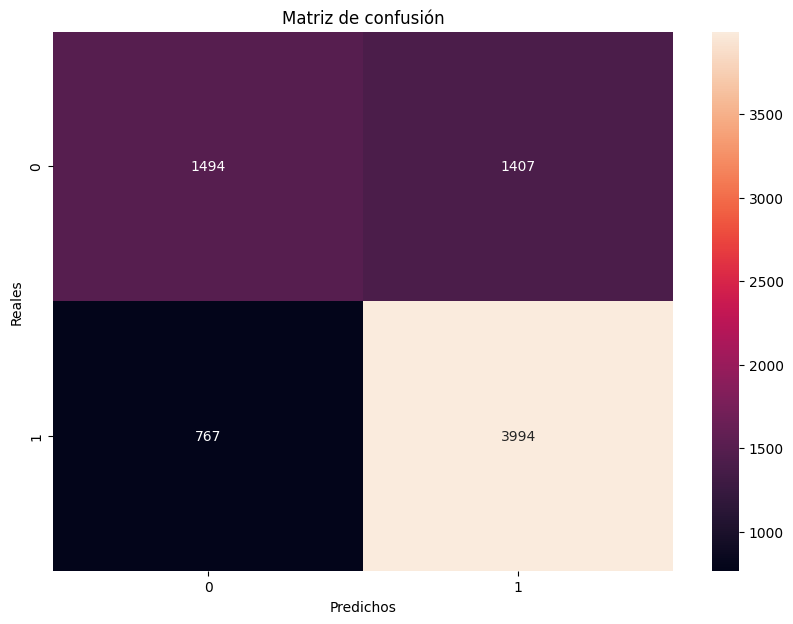

In [16]:
# Matriz de confusión - Gráfico
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, cmap='rocket', fmt='d')
plt.xlabel('Predichos')
plt.ylabel('Reales')
plt.title('Matriz de confusión')
plt.show()

**Interpretación de la Matriz de Confusión**
* **1494: Verdaderos negativos (TN)** - Casos que fueron negativos y clasificados como negativos.
* **1407: Falsos positivos (FP)** - Casos que fueron negativos pero clasificados incorrectamente como positivos.
* **767: Falsos negativos (FN)** - Casos que fueron positivos pero clasificados incorrectamente como negativos.
* **3994: Verdaderos positivos (TP)** - Casos que fueron positivos y clasificados como positivos.


##### Reporte de clasificación

In [17]:
print(classification_report(y_test, y_pred_rl))

              precision    recall  f1-score   support

           0       0.66      0.51      0.58      2901
           1       0.74      0.84      0.79      4761

    accuracy                           0.72      7662
   macro avg       0.70      0.68      0.68      7662
weighted avg       0.71      0.72      0.71      7662



**Interpretación del Reporte de Clasificación**

**clase 0**: mantiene hipertension alta.

* **Precisión**: 66% de las predicciones fueron correctas.
* **Recall**: 51% de los casos reales fueron correctamente identificados.
* **F1-score**: 0.58, medida combinada de precisión y recall
* Existen 2901 casos reales en los datos de prueba

**clase 1**: no mantiene hipertension alta.

* **Precisión**: 74% de las predicciones fueron correctas.
* **Recall**: 84% de los casos reales fueron correctamente identificados.
* **F1-score**: 0.79, medida combinada de precisión y recall
* Existen 4761 casos reales en los datos de prueba

##### Ajuste de hiperparámetros

In [18]:
# Crear el GridSearchCV
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['newton-cg', 'lbfgs'],
    'classifier__penalty': ['l2', 'none']
}

grid_search_rl = GridSearchCV(modelo_rl, param_grid_lr, cv=5)

# Suprimir warnings durante la búsqueda de hiperparámetros
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    grid_search_rl.fit(X_train, y_train)

# Mostrar el mejor estimador y el mejor puntaje
mejor_estimador_rl = grid_search_rl.best_estimator_

print("Mejor Estimador:\n", mejor_estimador_rl)

Mejor Estimador:
 Pipeline(steps=[('classifier',
                 LogisticRegression(C=0.1, max_iter=500, solver='newton-cg'))])


**Interpretación del Ajuste de hiperparámetros**

El resultado del ajuste es C = 0.1 y solver = 'newton-cg'. 

Esto significa que se debe seleccionar una regularización 'l2' relativamente fuerte con un C bajo y utilizar el solver de Newton-CG para la optimización.

#### Evaluación del modelo final

In [19]:
# Hacer predicciones
y_pred_mejor_rl = mejor_estimador_rl.predict(X_test)

# Evaluar el modelo
score_mejor_rl = accuracy_score(y_test, y_pred_mejor_rl)

print(f'Exactitud del nuevo modelo: {score_mejor_rl * 100:.2f}%')


Exactitud del nuevo modelo: 71.64%


#### Evaluación del rendimiento del modelo final

##### Matriz de confusión

In [20]:
# Matriz de confusion
matriz_confusion_mejor_rl = confusion_matrix(y_test, y_pred_mejor_rl)
print('Matriz de Confusión:')
print(matriz_confusion_mejor_rl)

Matriz de Confusión:
[[1495 1406]
 [ 767 3994]]


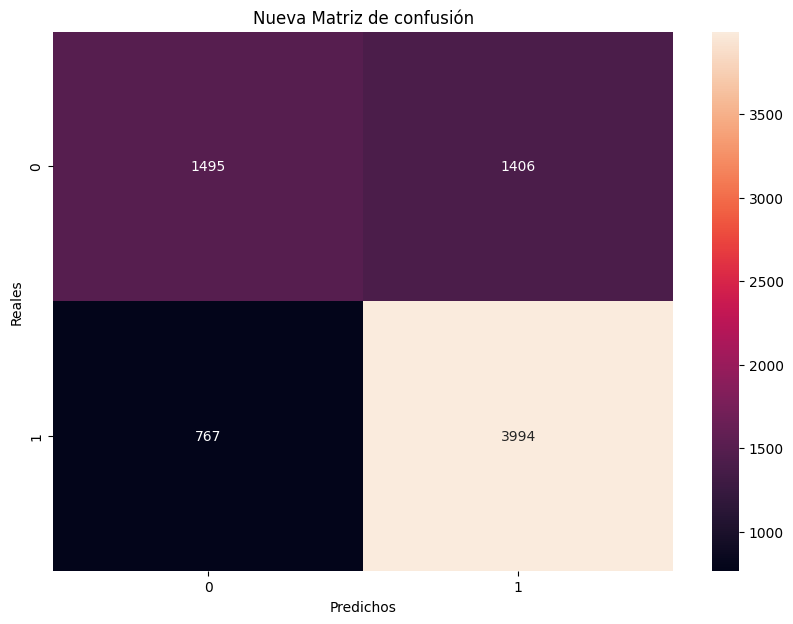

In [21]:
# Matriz de confusión - Gráfico
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion_mejor_rl, annot=True, cmap='rocket', fmt='d')
plt.xlabel('Predichos')
plt.ylabel('Reales')
plt.title('Nueva Matriz de confusión')
plt.show()

**Interpretación de la Matriz de Confusión**
* **1495: Verdaderos negativos (TN)** - Casos que fueron negativos y clasificados como negativos.
* **1406: Falsos positivos (FP)** - Casos que fueron negativos pero clasificados incorrectamente como positivos.
* **767: Falsos negativos (FN)** - Casos que fueron positivos pero clasificados incorrectamente como negativos.
* **3994: Verdaderos positivos (TP)** - Casos que fueron positivos y clasificados como positivos.


##### Reporte de clasificación

In [22]:
print(classification_report(y_test, y_pred_mejor_rl))

              precision    recall  f1-score   support

           0       0.66      0.52      0.58      2901
           1       0.74      0.84      0.79      4761

    accuracy                           0.72      7662
   macro avg       0.70      0.68      0.68      7662
weighted avg       0.71      0.72      0.71      7662



**Interpretación del Reporte de Clasificación**

**clase 0**: mantiene hipertension alta.

* **Precisión**: 66% de las predicciones fueron correctas.
* **Recall**: 52% de los casos reales fueron correctamente identificados.
* **F1-score**: 0.58, medida combinada de precisión y recall
* Existen 2901 casos reales en los datos de prueba

**clase 1**: no mantiene hipertension alta.

* **Precisión**: 74% de las predicciones fueron correctas.
* **Recall**: 84% de los casos reales fueron correctamente identificados.
* **F1-score**: 0.79, medida combinada de precisión y recall
* Existen 4761 casos reales en los datos de prueba

##### Importancia de las columnas

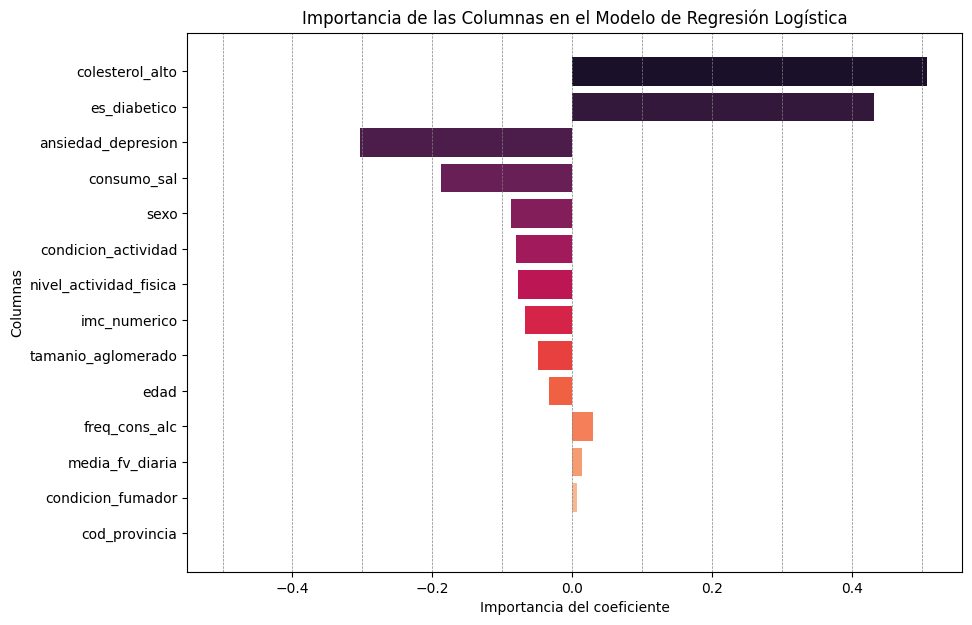

In [23]:
# Extraer el modelo de regresión logística del pipeline
modelo_columnas_rl = grid_search_rl.best_estimator_['classifier']

# Obtener los coeficientes y nombres de las columnas
coeficientes_rl = modelo_columnas_rl.coef_[0]
nombres_columnas_rl = X_train.columns

# Crear un DataFrame con los coeficientes y sus nombres
importancia_columnas = pd.DataFrame({
    'Columna': nombres_columnas_rl,
    'Importancia': coeficientes_rl
})

# Ordenar por la importancia absoluta de los coeficientes
importancia_columnas['Importancia_absoluta'] = np.abs(importancia_columnas['Importancia'])
importancia_columnas = importancia_columnas.sort_values('Importancia_absoluta', ascending=False)

# Paleta de colores
colors = sns.color_palette("rocket", n_colors=len(importancia_columnas))

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 7))
plt.barh(
    importancia_columnas['Columna'], 
    importancia_columnas['Importancia'], 
    color=colors
)

# Añadir líneas verticales para los xlabels
for x in np.linspace(-0.5, 0.5, num=11):
    plt.axvline(x, color='gray', linestyle='--', linewidth=0.5)

# Añadir título y etiquetas
plt.title('Importancia de las Columnas en el Modelo de Regresión Logística')
plt.xlabel('Importancia del coeficiente')
plt.ylabel('Columnas')

 # Invertir el eje para que las columnas más importantes estén arriba
plt.gca().invert_yaxis() 

plt.show()

* Las columnas con coeficientes más altos (en valor absoluto) tienen un mayor impacto en la predicción. 

* Los coeficientes positivos y negativos indican si la columna incrementa o disminuye la probabilidad de **mantener hipertensión alta**, respectivamente.

* Para este modelo, identificamos 2 características con una gran incidencia **positiva**: colesterol_alto y es_diabetico. Esto indica que tener **colesterol alto** o **ser diabético** **AUMENTAN** las probabilidades de **ser hipertenso**.

* Por otro lado, identificamos 2 características con una gran incidencia **negativa**: ansiedad_depresion y consumo_sal. Esto indica que tener **ansiedad o depresión** o **consumir sal en exceso** **DISMINUYEN** las probabilidades de **ser hipertenso**.

#### Conclusiones
Los resultados del modelo de regresión logística, tanto antes como después del **Ajuste de Hiperparámetros**, muestran muy pocas diferencias en las métricas clave:

**Poco cambio en la exactitud**: aumentó de 71.63% a 71.64%.

**Estabilidad en la matriz de confusión**: ligera variación en el número de ejemplos correcta e incorrectamente clasificados.

**Métricas de clasificación similares**: las métricas de precisión, recall y f1-score para ambas clases (0 y 1) no han cambiado significativamente.

**CONCLUSIÓN GENERAL**: 

Dado que los resultados iniciales y finales son casi idénticos, es probable que el modelo esté limitado en su capacidad para mejorar con los datos y las características actuales. Eventualmente se podría incluir columnas adicionales que puedan mejorar las diferencias entre las clases.
Es posible que el modelo **Regresión Logística** no sea el más adecuado para los datos; se evaluarán otros modelos para comparar el desempeño de cada uno.

### Modelo 2: Random Forest

In [24]:
# Como realice el preprocesado en la primera seccion, voy a crear un pipeline solo con el clasificador
pipeline = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42,criterion= 'gini'))
])

In [25]:
# Creare tambien un diccionario con parametros para Gridsearch, que me ayudara a buscar los mejores parametros para mi modelo de modo mas rapido/automatizado
parametros = {
    'classifier__n_estimators': [150,200],
    'classifier__max_depth': [8,10],
    'classifier__min_samples_split': [2,4],
    'classifier__min_samples_leaf': [1] 
}

In [26]:
# Creo mi GridSearchCV
grid_search = GridSearchCV(pipeline, parametros, scoring='roc_auc',return_train_score = True,)

In [27]:
# Ajustar GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [8, 10],
                         'classifier__min_samples_leaf': [1],
                         'classifier__min_samples_split': [2, 4],
                         'classifier__n_estimators': [150, 200]},
             return_train_score=True, scoring='roc_auc')

In [30]:
#Guardo el modelo encontrado por gridsearch y que pude probar con mi notebook(sin que tarde 15min+)
mejor_modelo = grid_search.best_estimator_

In [31]:
y_pred_rf = mejor_modelo.predict(X_test)

In [47]:
y_train_pred_rf = mejor_modelo.predict(X_train)

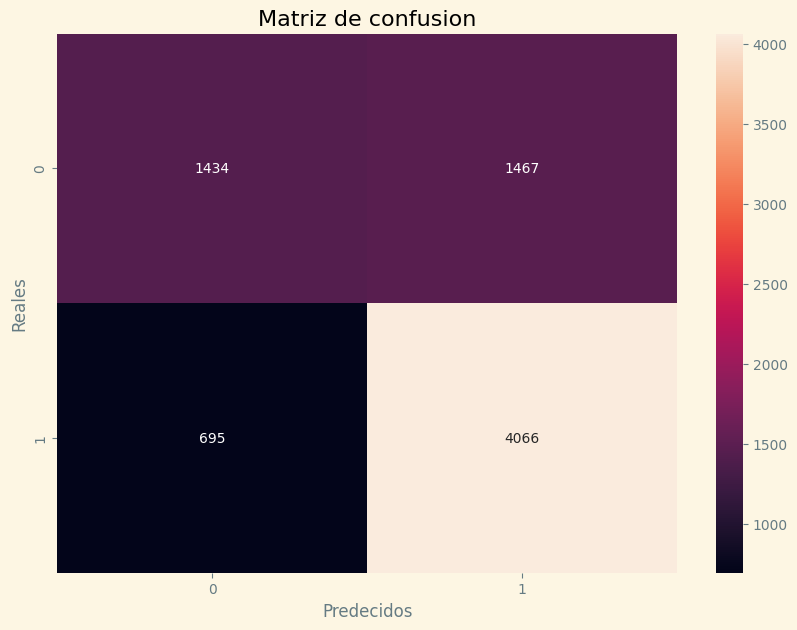

In [42]:
# Ahora de manera grafica 
matriz_conf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_conf, annot=True, cmap='rocket', fmt='d')
plt.xlabel('Predecidos')
plt.ylabel('Reales')
plt.title('Matriz de confusion')
plt.show()

In [43]:
# Finalmente, evaluo el modelo viendo que tan bien predice mi variable objetivo, evaluandolo con el conjunto de datos de testeo
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.67      0.49      0.57      2901
           1       0.73      0.85      0.79      4761

    accuracy                           0.72      7662
   macro avg       0.70      0.67      0.68      7662
weighted avg       0.71      0.72      0.71      7662



In [34]:
# Creo una variable auxiliar para guardar las feature importances
feat = mejor_modelo.steps[0][1].feature_importances_

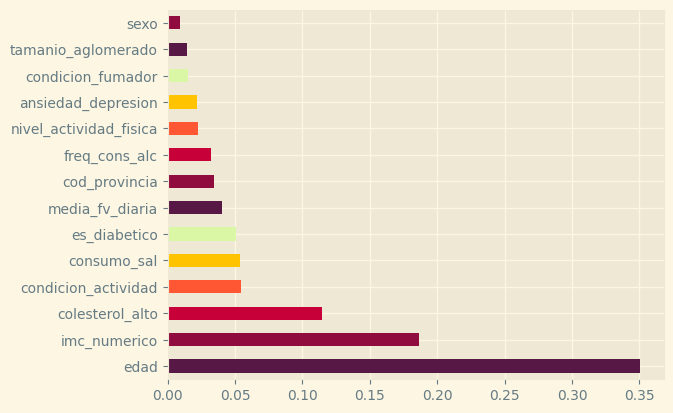

In [38]:
# Grafico las feature importances para saber cuales de mis caracteristicas seleccionadas tuvieron mas peso (a futuro podrian eliminarse aquellas que no para talvez optimizar los parametros)
feat_importances = pd.Series(feat , index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',  color=['#581845','#900C3F','#C70039','#FF5733','#FFC300','#DAF7A6'])
plt.style.use('Solarize_Light2')
plt.show()

Las etiquetas son para 'mantiene_ha_alta'
0:SI
1:NO

__En conclusion__ 

Tras evaluar una serie de parametros para este modelo y elegir el mejor obseramos:
+ El reporte de clasificacion (classification_report(y_test, y_pred)) nos indica que el modelo tiene una exactitud del 72% en la prediccion de nuevas etiquetas. Particularmente predice con una presicion del 67% las etiquetas correspondientes a la clase 0 (mantiene hipertension alta) y con una presicion del 73% para las correspondientes a clase 1 (no mantiene hipertension alta), entonces podria decirse que este modelo funciona mejor para predecir a aquellos individuos que efectivamente no tienen hipertencion arterial alta.
+ El grafico de la matriz de confusion nos indica que: 

    + 705 casos fueron predichos como 0(hipertensos) cuando eran 1(no hipertensos) 
    + 1434 casos fueron predecidos como 1(no hipertensos) cuando eran 0(hipertensos)
    + 1467 casos fueron predecidos como 0(hipertensos) cuando eran 0(hipertensos)
    + 4056 casos fueron predecidos como 1(no hipertensos) cuando eran 1(no hipertensos)

Entonces, solo el 49% de aquellos etiquetados como hipertensos fueron etiquetados correctamente, mientras que el 85% de los etiquetados como no hipertensos fue etiquetado correctamente.

+ Feature importance, las caracteristicas que mas parecen importar para el modelo durante la clasificacion son: la edad, el imc y si tiene colesterol alto.

In [36]:
friesgo_cod.shape

(25539, 16)

### Modelo 3

### CONCLUSION

In [48]:
# acuracy 1

# acuracy 2
print(f'La exactitud con RF fue de {accuracy_score(y_test, y_pred_rf)}')
print(f'El modelo  de RF se ajusto a los datos de entrenamiento {accuracy_score(y_train, y_train_pred_rf)}')
# acuracy 3

# podemos usar el acuracy de test y train este ultimo para ver si el modelo se sobreajusto a los datos

La exactitud con RF fue de 0.7178282432785174
El modelo  de RF se ajusto a los datos de entrenamiento 0.7504614868266488


Durante la trayectoria del notebook probamos tres modelos:
+ Regresion Logistica: el primero y 'mas simple', si bien se hizo mucho incapie en tratar de mejorar los parametros se logro una exactitud del x% con una mejora del x%. 
+ Random Forest: el segundo en probarse y a pesar de la potencia del algoritmo se logro una exactitud similar al de la regresion logistica, tras realizar un feature importances, queda en claro que este modelo tiene mucho potencial para mejorar su exactitud,falta trabajo en la mejora de parametros para este fin. Puede afirmarse que este modelo no esta/ o esta muy poco sobre-ajustado a los datos de entrenamiento.
+ Suport Vector Machine,

Tambien cabe mencionar que la feature importances debe medirse a futuro con un medidor que sea independiente del modelo, por ejemplo permutation importances.